In [2]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

In [3]:
# Reading of the train dataset from project 2
df_train = pd.read_csv("../datasets/train.csv")

In [4]:
# Shape check
df_train.shape

(2051, 81)

In [5]:
# Looking into the data
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Data Analysis

To start off the data analysis, with reference to an external article:
* Factors that affect house prices [https://www.opendoor.com/w/blog/factors-that-influence-home-value]

The article mentions that the following factors that are related to the problem statement, are factors that highly affect the sale prices.

1. Location
2. Home Size and Usable Space
3. Age and Condition
4. Upgrades and Updates

## Location

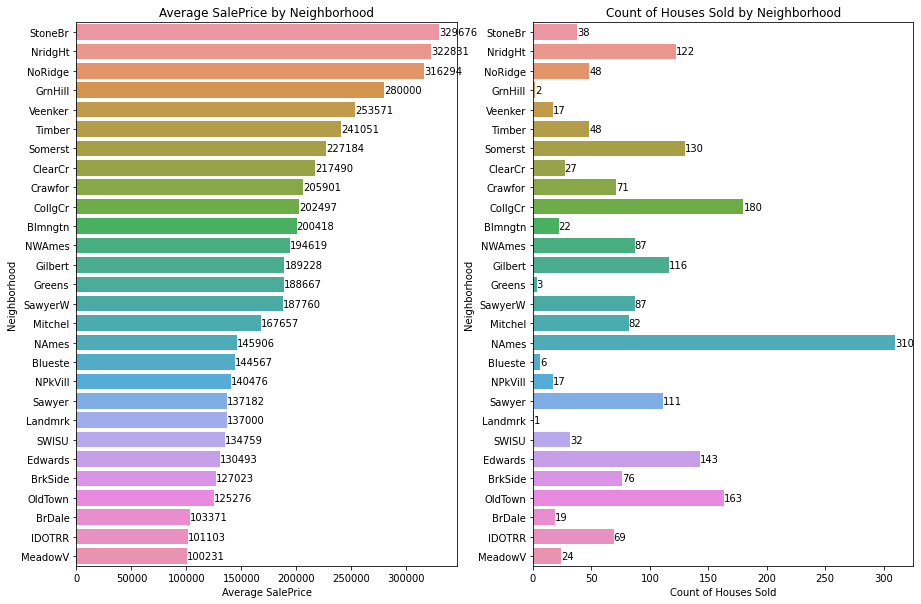

In [19]:
# Looking into the location of the houses sold

# Setting the grid for the charts
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Creation of separate dataframe with the selected columns
df_train_loc_hou = df_train[["SalePrice", "Neighborhood"]].reset_index(drop=True)
df_train_loc_hou = (
    df_train_loc_hou.groupby(["Neighborhood"])["SalePrice"].mean().reset_index()
)

# Plotting of the chart
sns.barplot(
    data=df_train_loc_hou,
    y="Neighborhood",
    x="SalePrice",
    order=df_train_loc_hou.groupby("Neighborhood")["SalePrice"]
    .mean()
    .reset_index()
    .sort_values(by="SalePrice", ascending=False)["Neighborhood"], # order parameter is used to arrange the data accordingly
    ci=None, # To remove the std bar
    ax=axes[0], # Position of chart on the grid - to take note, charts with more than 1 horizonality or 1 vertically, ax=axes[0,0] - must contain 2 numbers
)

axes[0].bar_label(axes[0].containers[0]) # To set up the data values in the chart
axes[0].set_xlabel("Average SalePrice")
axes[0].set_title("Average SalePrice by Neighborhood")

# Bar plot by default, shows the means of the data values - refer to documentation
# '''It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.'''

sns.countplot(
    data=df_train,
    y="Neighborhood",
    order=df_train_loc_hou.groupby("Neighborhood")["SalePrice"]
    .mean()
    .reset_index()
    .sort_values(by="SalePrice", ascending=False)["Neighborhood"],
    ax=axes[1], # Change the axes accordingly
)

axes[1].bar_label(axes[1].containers[0])
axes[1].set_xlabel("Count of Houses Sold")
axes[1].set_title("Count of Houses Sold by Neighborhood")

# To save the file
plt.savefig("./charts/Ave and count for Neighborhood.png", bbox_inches="tight")
plt.show()

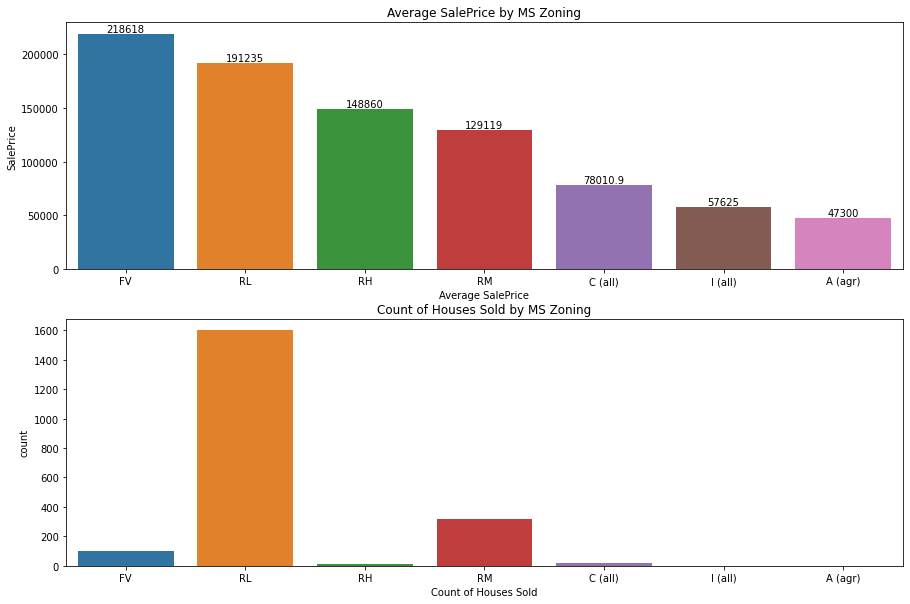

In [22]:
# Looking into the location of the houses sold
fig, axes = plt.subplots(2,1, figsize=(15,10))

df_train_ms_zoning = df_train[["SalePrice", "MS Zoning"]].reset_index(drop=True)
df_train_ms_zoning = (
    df_train_ms_zoning.groupby(["MS Zoning"])["SalePrice"].mean().reset_index()
)

sns.barplot(
    data=df_train_ms_zoning,
    x="MS Zoning",
    y="SalePrice",
    order=df_train_ms_zoning.groupby('MS Zoning')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS Zoning'],
    ci=None,
    ax=axes[0]
)
axes[0].bar_label(axes[0].containers[0])
axes[0].set_xlabel("Average SalePrice")
axes[0].set_title("Average SalePrice by MS Zoning")

sns.countplot(
    data=df_train,
    x="MS Zoning",
    order=df_train_ms_zoning.groupby('MS Zoning')['SalePrice'].mean().reset_index().sort_values(by='SalePrice', ascending=False)['MS Zoning'],
    ax=axes[1]
)

axes[1].bar_label(axes[0].containers[0])
axes[1].set_xlabel("Count of Houses Sold")
axes[1].set_title("Count of Houses Sold by MS Zoning")
plt.savefig("./charts/Ave and count for MS Zoning.png", bbox_inches='tight')
plt.show()

For plt.subplots(x,y) where x or y is 1,

* The reference of ax=axes[0]
  * Single digit only, putting [0,0] results in error

For plt.subplots(x,y) where x or y is more than 1

* For example, x=3, y=4

**axes position**

||y=1|y=2|y=3|y=4|
|--|--|--|--|--|
x=1|[0,0] | [0,1] | [0,2] | [1,3]
x=2|[1,0] | [1,1] | [1,2] | [1,3]
x=3|[2,0] | [2,1] | [2,2] | [2,3]

## Home Size and Usable Space

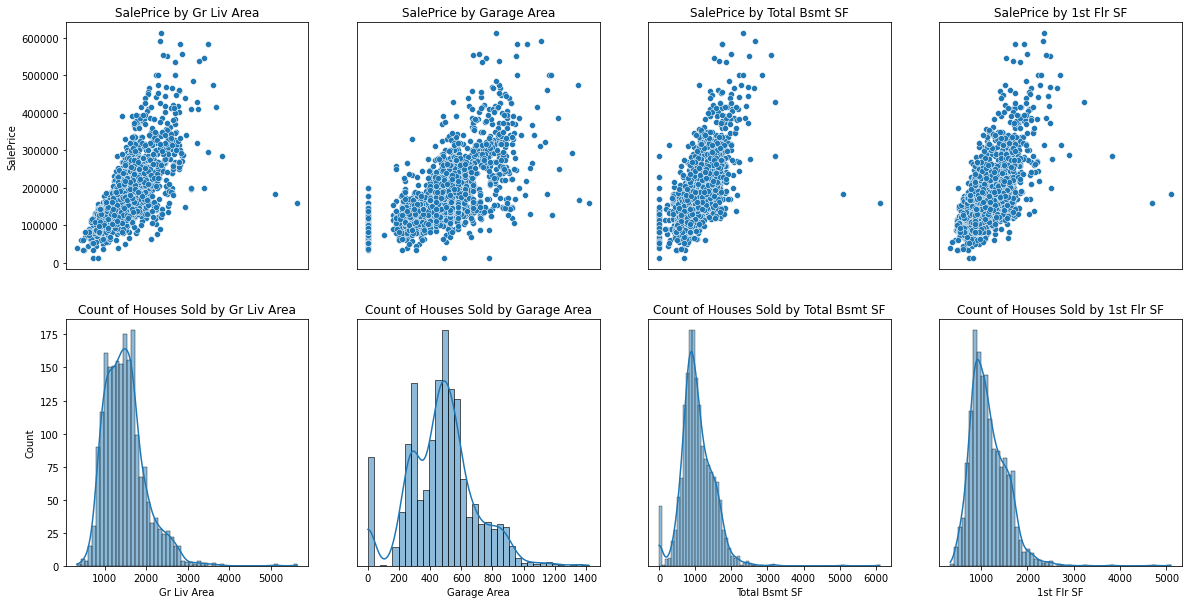

In [23]:
# Looking into the location of the houses sold

# Setting up the grid
fig, axes = plt.subplots(2,4, figsize=(20,10)) 

# Gr Liv Area
sns.scatterplot(
    data=df_train,
    x="Gr Liv Area",
    y="SalePrice",
    ax=axes[0,0] # Position the chart - to take note, charts with more than 1 horizonality or 1 vertically, ax=axes[0,0] - must contain 2 numbers
)
axes[0,0].get_xaxis().set_visible(False) # To hide the x-axis to prevent cluttering
axes[0,0].set_title("SalePrice by Gr Liv Area")

sns.histplot(
    data=df_train,
    x="Gr Liv Area",
    ax=axes[1,0],
    kde=True
)
axes[1,0].set_xlabel("Gr Liv Area")
axes[1,0].set_title("Count of Houses Sold by Gr Liv Area")


# Garage Area
sns.scatterplot(
    data=df_train,
    x="Garage Area",
    y="SalePrice",
    ax=axes[0,1]
)
axes[0,1].get_xaxis().set_visible(False)
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].set_title("SalePrice by Garage Area")

sns.histplot(
    data=df_train,
    x="Garage Area",
    ax=axes[1,1],
    kde=True
)
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].set_xlabel("Garage Area")
axes[1,1].set_title("Count of Houses Sold by Garage Area")


# Total Bsmt SF
sns.scatterplot(
    data=df_train,
    x="Total Bsmt SF",
    y="SalePrice",
    ax=axes[0,2]
)
axes[0,2].get_xaxis().set_visible(False)
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].set_title("SalePrice by Total Bsmt SF")

sns.histplot(
    data=df_train,
    x="Total Bsmt SF",
    ax=axes[1,2],
    kde=True
)
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].set_xlabel("Total Bsmt SF")
axes[1,2].set_title("Count of Houses Sold by Total Bsmt SF")


# 1st Flr SF
sns.scatterplot(
    data=df_train,
    x="1st Flr SF",
    y="SalePrice",
    ax=axes[0,3]
)
axes[0,3].get_xaxis().set_visible(False)
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].set_title("SalePrice by 1st Flr SF")

sns.histplot(
    data=df_train,
    x="1st Flr SF",
    ax=axes[1,3],
    kde=True
)
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].set_xlabel("1st Flr SF")
axes[1,3].set_title("Count of Houses Sold by 1st Flr SF")


plt.savefig("./charts/House size.png", bbox_inches='tight')
plt.show()

## Age and Condition

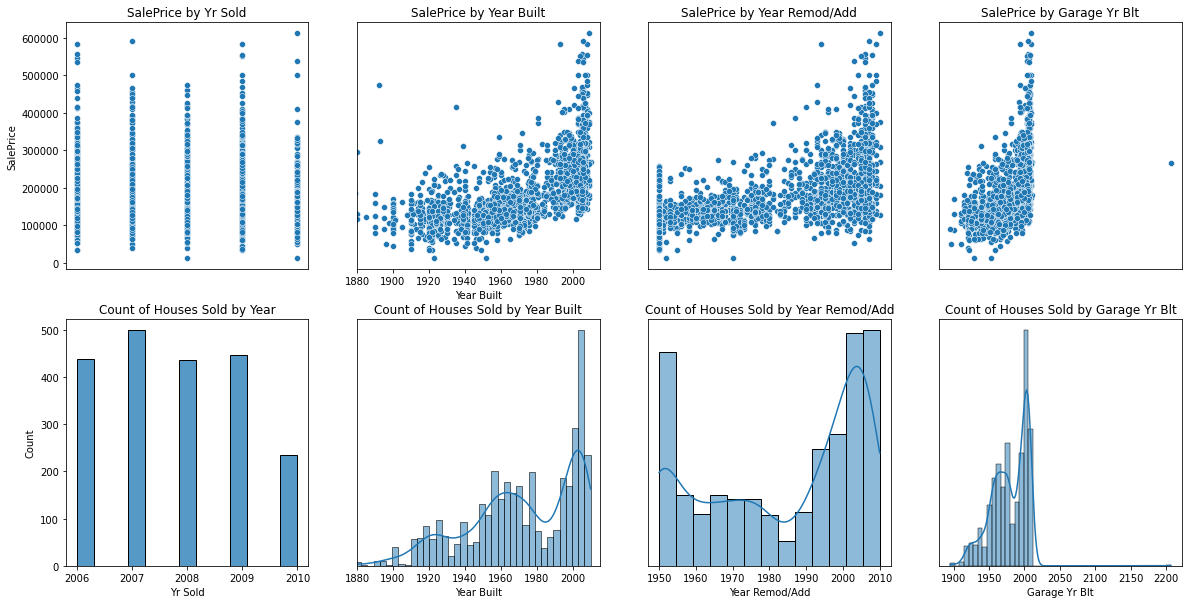

In [24]:
# Looking into the age of the houses sold
fig, axes = plt.subplots(2,4, figsize=(20,10))

# Year Sold
sns.scatterplot(
    data=df_train,
    x="Yr Sold",
    y="SalePrice",
    ax=axes[0,0]
)
axes[0,0].get_xaxis().set_visible(False)
axes[0,0].set_title("SalePrice by Yr Sold")

sns.histplot(
    data=df_train,
    x="Yr Sold",
    ax=axes[1,0],
    # kde=True
)
axes[1,0].set_xlabel("Yr Sold")
axes[1,0].set_title("Count of Houses Sold by Year")


# Year Built
sns.scatterplot(
    data=df_train,
    x="Year Built",
    y="SalePrice",
    ax=axes[0,1]
)
axes[0,1].set_xlim(1880, 2015)
axes[0,1].get_xaxis().set_visible(True)
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].set_title("SalePrice by Year Built")

sns.histplot(
    data=df_train,
    x="Year Built",
    ax=axes[1,1],
    kde=True,
    bins=40
)
axes[1,1].set_xlim(1880, 2015)
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].set_xlabel("Year Built")
axes[1,1].set_title("Count of Houses Sold by Year Built")


# Year Remod/Add
sns.scatterplot(
    data=df_train,
    x="Year Remod/Add",
    y="SalePrice",
    ax=axes[0,2]
)
axes[0,2].get_xaxis().set_visible(False)
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].set_title("SalePrice by Year Remod/Add")

sns.histplot(
    data=df_train,
    x="Year Remod/Add",
    ax=axes[1,2],
    kde=True
)
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].set_xlabel("Year Remod/Add")
axes[1,2].set_title("Count of Houses Sold by Year Remod/Add")


# 1st Flr SF
sns.scatterplot(
    data=df_train,
    x="Garage Yr Blt",
    y="SalePrice",
    ax=axes[0,3]
)
axes[0,3].get_xaxis().set_visible(False)
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].set_title("SalePrice by Garage Yr Blt")

sns.histplot(
    data=df_train,
    x="Garage Yr Blt",
    ax=axes[1,3],
    kde=True
)
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].set_xlabel("Garage Yr Blt")
axes[1,3].set_title("Count of Houses Sold by Garage Yr Blt")


plt.savefig("./charts/Age of Houses Sold.png", bbox_inches='tight')
plt.show()

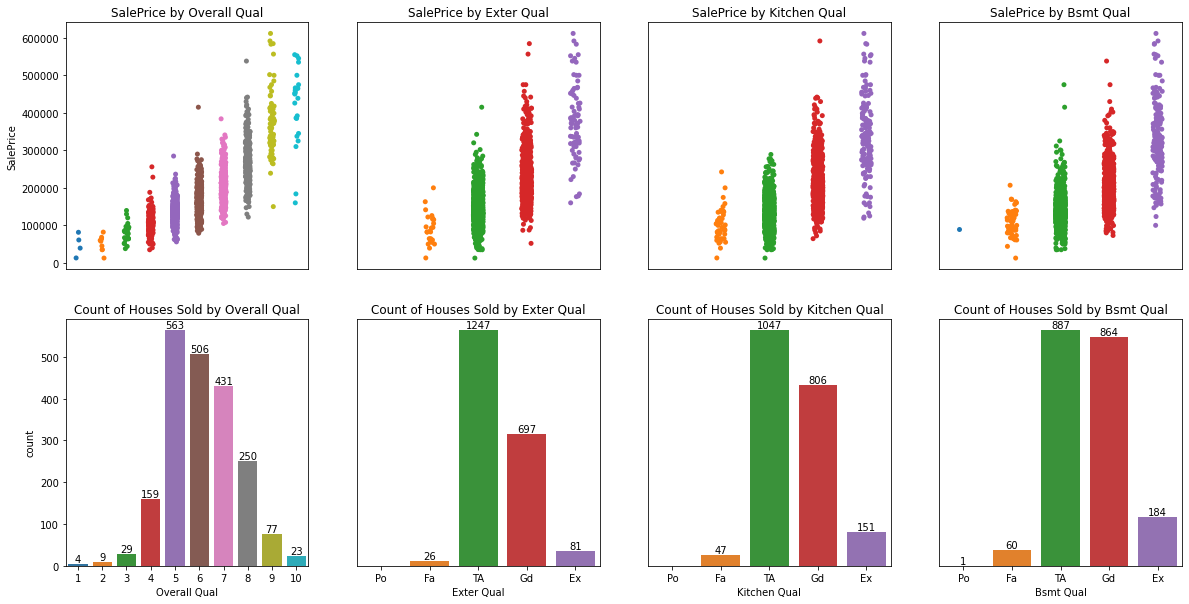

In [25]:
# Looking into the quality of the houses sold
fig, axes = plt.subplots(2,4, figsize=(20,10))

# Overall Qual
sns.stripplot(
    data=df_train,
    x="Overall Qual",
    y="SalePrice",
    ax=axes[0,0]
)
axes[0,0].get_xaxis().set_visible(False)
axes[0,0].set_title("SalePrice by Overall Qual")

sns.countplot(
    data=df_train,
    x="Overall Qual",
    ax=axes[1,0],
)
axes[1,0].bar_label(axes[1,0].containers[0])
axes[1,0].set_xlabel("Overall Qual")
axes[1,0].set_title("Count of Houses Sold by Overall Qual")


# Exter Qual
sns.stripplot(
    data=df_train,
    x="Exter Qual",
    y="SalePrice",
    ax=axes[0,1],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[0,1].get_xaxis().set_visible(False)
axes[0,1].get_yaxis().set_visible(False)
axes[0,1].set_title("SalePrice by Exter Qual")

sns.countplot(
    data=df_train,
    x="Exter Qual",
    ax=axes[1,1],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[1,1].bar_label(axes[1,1].containers[0])
axes[1,1].get_yaxis().set_visible(False)
axes[1,1].set_xlabel("Exter Qual")
axes[1,1].set_title("Count of Houses Sold by Exter Qual")


# Kitchen Qual
sns.stripplot(
    data=df_train,
    x="Kitchen Qual",
    y="SalePrice",
    ax=axes[0,2],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[0,2].get_xaxis().set_visible(False)
axes[0,2].get_yaxis().set_visible(False)
axes[0,2].set_title("SalePrice by Kitchen Qual")

sns.countplot(
    data=df_train,
    x="Kitchen Qual",
    ax=axes[1,2],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[1,2].bar_label(axes[1,2].containers[0])
axes[1,2].get_yaxis().set_visible(False)
axes[1,2].set_xlabel("Kitchen Qual")
axes[1,2].set_title("Count of Houses Sold by Kitchen Qual")


# 1st Flr SF
sns.stripplot(
    data=df_train,
    x="Bsmt Qual",
    y="SalePrice",
    ax=axes[0,3],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[0,3].get_xaxis().set_visible(False)
axes[0,3].get_yaxis().set_visible(False)
axes[0,3].set_title("SalePrice by Bsmt Qual")

sns.countplot(
    data=df_train,
    x="Bsmt Qual",
    ax=axes[1,3],
    order=["Po", "Fa", "TA", "Gd", "Ex"]
)
axes[1,3].bar_label(axes[1,3].containers[0])
axes[1,3].get_yaxis().set_visible(False)
axes[1,3].set_xlabel("Bsmt Qual")
axes[1,3].set_title("Count of Houses Sold by Bsmt Qual")


plt.savefig("./charts/Quality of Houses Sold.png", bbox_inches='tight')
plt.show()

In [ ]:
# To showcase the range of the IQR on the scatter plot
plt.figure(figsize=(12, 6))

plt.scatter(data=df_train, x="Gr Liv Area", y="SalePrice", color='b')
plt.scatter(data=df_outliers, x="Gr Liv Area", y="SalePrice", color="r")

plt.xlabel(xlabel="Gr Liv Area")
plt.ylabel(ylabel="SalePrice")
plt.axvline((Q1 - 1.5 * IQR).values, color="r", linestyle="--", label="229.75")
plt.axvline((Q3 + 1.5 * IQR).values, color="r", linestyle="--", label="2627.75")
plt.legend(labels=["Not Outliers", "Outliers"])
plt.grid(False)
plt.title("Gr Liv Area vs SalePrice")


plt.savefig("./charts/Gr Liv Area with outlier shown.png")
plt.show()